In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset and keep only specific columns
data = "car_fuel_efficiency.csv"

# Define the columns to keep
columns_to_keep = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df = pd.read_csv(data, usecols=columns_to_keep)


# Display the dataset info
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (9704, 5)
Columns: ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: title={'center': 'Fuel Efficiency Distribution'}, ylabel='Frequency'>

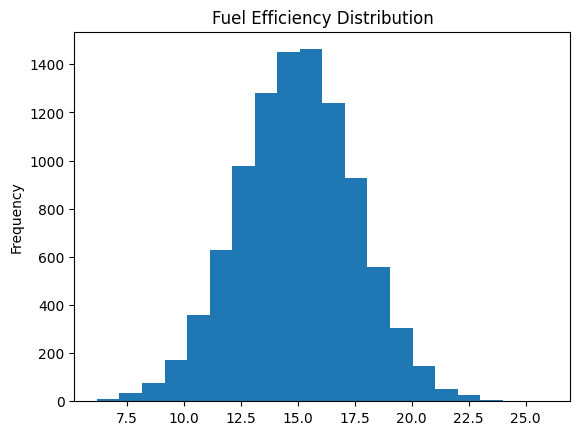

In [3]:
df['fuel_efficiency_mpg'].plot(kind='hist', bins=20, title='Fuel Efficiency Distribution')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


## Question 1
- There's one column with missing values. What is it
- Answer: horsepower

In [5]:
df[df['horsepower'].isna()]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3,220,NaN,2542.392402,2009,16.912736
5,190,NaN,2484.883986,2008,17.271818
11,150,NaN,1967.200421,2014,20.504447
60,240,NaN,2677.521710,2003,16.317431
65,240,NaN,1820.873766,2005,21.442806
...,...,...,...,...,...
9587,210,NaN,1912.604777,2019,19.307047
9625,220,NaN,3293.286341,2007,13.472440
9628,240,NaN,3665.251410,2021,13.115891
9635,230,NaN,3266.906908,2016,14.308767


## Question 2
- What's the median (50% percentile) for variable 'horsepower'?
- Answer: 149

In [6]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


## Split the dataset
- Split the dataset into train, test and validation sets.

In [7]:
import numpy as np


np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [8]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [9]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [10]:
np.ones(df_train.shape[0])

array([1., 1., 1., ..., 1., 1., 1.], shape=(5824,))

In [11]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]
  

In [13]:
df_train.isna().sum()

engine_displacement      0
horsepower             413
vehicle_weight           0
model_year               0
dtype: int64

In [ ]:
# fill missing values with 0
X_train = df_train.fillna(0).values

In [24]:
X_train_mean_filled = df_train.fillna(df_train.mean()).values

In [25]:
w0, w = train_linear_regression(X_train_mean_filled, y_train)
y_pred_mean = w0 + X_train_mean_filled.dot(w)

In [40]:
def prepare_X(df):
    X = df.fillna(0).values
    return X

<Axes: ylabel='Count'>

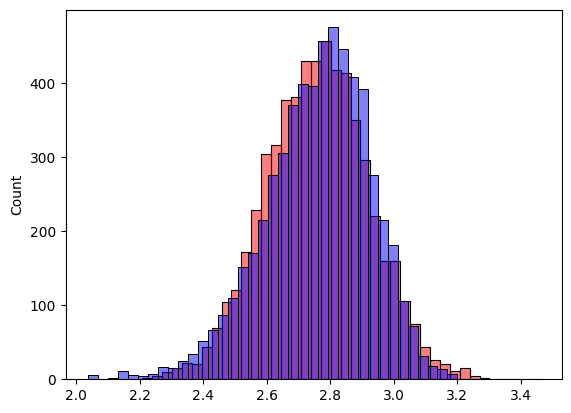

In [26]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=40)
sns.histplot(y_train, color='blue', alpha=0.5, bins=40)

In [ ]:
w0, w = train_linear_regression(X_train, y_train)

array([ 7.48585751e-06,  2.43675962e-04, -3.21959038e-04,  1.02373968e-04])

In [19]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

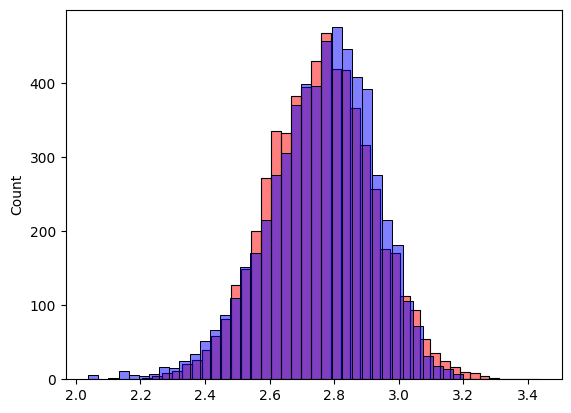

In [23]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=40)
sns.histplot(y_train, color='blue', alpha=0.5, bins=40)

## Question 3

## RMSE

In [32]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### dataset with nan


In [47]:
print(round(rmse(np.expm1(y_train), np.expm1(y_pred)), 2))

0.61


### Mean dataset

In [46]:
print(round(rmse(np.expm1(y_train), np.expm1(y_pred_mean)), 2))

0.56


### validation dataset

In [45]:
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print(round(rmse(np.expm1(y_val), np.expm1(y_pred_val)), 2))


0.69
